## Analysis of validation data

This notebook assesses the performance of the GPROF retrieval against ground radar data.



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from pathlib import Path
import seaborn as sns
sns.reset_orig()

In [2]:
from gprof_nn.plotting import set_style
set_style(latex=True)

In [3]:
from gprof_nn.validation import get_colors
COLORS = get_colors()

In [4]:
algs = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
def plot_time_dist(results):
    """
    Plot counts of validation samples by month.
    
    Args:
        results: Dict containing the results for all evaluated algorithms.
    """
    time_0 = np.array([results[alg].time.data.min() for alg in algs]).min()
    time_1 = np.array([results[alg].time.data.max() for alg in algs]).max()
    bins = np.arange(
        time_0.astype("datetime64[M]"),
        time_1.astype("datetime64[M]") + np.timedelta64(2, "M")
    ).astype("datetime64[s]")
    cts = {}
    for alg in algs:
        valid = (results[alg].surface_precip_avg.data >= 0) * (results[alg].surface_precip.data >= 0)
        times = results[alg].time.data[valid]
        cts[alg] = np.histogram(times.astype("datetime64[s]"), bins=bins)[0]
    
    x = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
    
    f, ax = plt.subplots(1, 1)
    for alg in algs:
        ax.plot(x, cts[alg], label=alg)
    for l in ax.xaxis.get_ticklabels():
        l.set_rotation(90)
    ax.set_ylabel("Number of validation samples")
    ax.legend()

In [6]:
import pickle
from gprof_nn.validation import calculate_error_metrics

results_tmi = {}
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
for k in groups:
    results_tmi[k] = xr.load_dataset(f"/home/simonpf/data_3/gprof_nn/validation/tmipo/results_{k}.nc")

stats_tmi = calculate_error_metrics(results_tmi, groups, rqi_threshold=0.8)
stats_tmi["Sensor"] = "TMI"
stats_tmi_fpa = calculate_error_metrics(results_tmi, groups, rqi_threshold=0.8, fpa=True)
stats_tmi_fpa["Sensor"] = "TMI"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


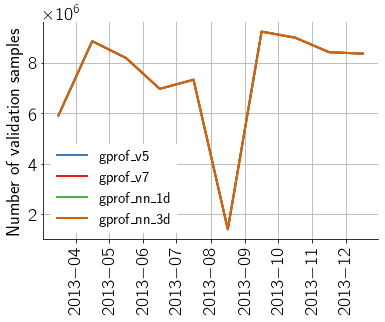

In [7]:
plot_time_dist(results_tmi)

In [8]:
stats_tmi

,Bias,MAE,MSE,Correlation coeff.,SMAPE,Sensor
GPROF V5,3.753492,0.115193,1.024443,0.550177,108.302481,TMI
GPROF V7,0.274594,0.121061,0.992925,0.556131,94.720626,TMI
GPROF-NN 1D,-11.430823,0.100494,0.913231,0.603821,95.569617,TMI
GPROF-NN 3D,8.657334,0.103279,0.841104,0.643944,82.104221,TMI


In [9]:
del results_tmi

In [10]:
import xarray as xr
results_ssmis = {}
sensors = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
for k in sensors:
    results_ssmis[k] = xr.load_dataset(f"/home/simonpf/data_3/gprof_nn/validation/ssmis/results_{k}.nc")
stats_ssmis = calculate_error_metrics(results_ssmis, groups, rqi_threshold=0.8)
stats_ssmis["Sensor"] = "SSMIS"
stats_ssmis_fpa = calculate_error_metrics(results_ssmis, groups, rqi_threshold=0.8, fpa=True)
stats_ssmis_fpa["Sensor"] = "SSMIS"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


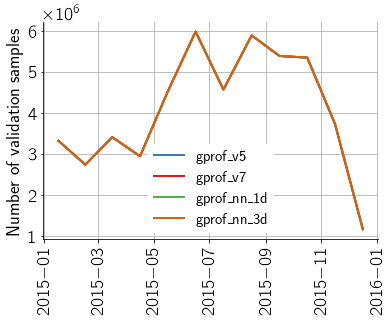

In [11]:
plot_time_dist(results_ssmis)

In [12]:
stats_ssmis

,Bias,MAE,MSE,Correlation coeff.,SMAPE,Sensor
GPROF V5,10.432697,0.133970,1.544145,0.343776,101.725992,SSMIS
GPROF V7,6.432420,0.128780,1.428498,0.397021,87.741055,SSMIS
GPROF-NN 1D,-9.425174,0.115062,1.420146,0.403707,87.971944,SSMIS
GPROF-NN 3D,-10.203421,0.114051,1.422605,0.401305,90.547068,SSMIS


In [13]:
del results_ssmis

In [14]:
results_amsr2 = {}
for k in sensors:
    results_amsr2[k] = xr.load_dataset(f"/home/simonpf/data_3/gprof_nn/validation/amsr2/results_{k}.nc")
stats_amsr2 = calculate_error_metrics(results_amsr2, groups, rqi_threshold=0.8)
stats_amsr2["Sensor"] = "AMSR 2"
stats_amsr2_fpa = calculate_error_metrics(results_amsr2, groups, rqi_threshold=0.8, fpa=True)
stats_amsr2_fpa["Sensor"] = "AMSR 2"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


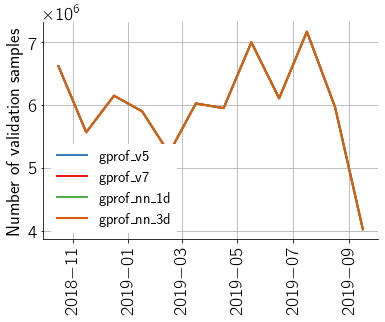

In [15]:
plot_time_dist(results_amsr2)

In [16]:
stats_amsr2

,Bias,MAE,MSE,Correlation coeff.,SMAPE,Sensor
GPROF V5,-6.686246,0.124194,1.208355,0.447005,116.186580,AMSR 2
GPROF V7,0.808643,0.133916,1.173583,0.447478,99.009538,AMSR 2
GPROF-NN 1D,-0.136681,0.120190,1.132508,0.500029,100.665821,AMSR 2
GPROF-NN 3D,-5.726559,0.111327,1.033503,0.539594,87.963556,AMSR 2


In [17]:
del results_amsr2

In [18]:
from gprof_nn.validation import calculate_error_metrics
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
results_mhs = {}
for k in groups:
    results_mhs[k] = xr.load_dataset(f"/home/simonpf/data_3/gprof_nn/validation/mhs/results_{k}.nc")
stats_mhs = calculate_error_metrics(results_mhs, groups, rqi_threshold=0.8)
stats_mhs["Sensor"] = "MHS"
stats_mhs_fpa = calculate_error_metrics(results_mhs, groups, rqi_threshold=0.8, fpa=True)
stats_mhs_fpa["Sensor"] = "MHS"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


In [19]:
stats_mhs

,Bias,MAE,MSE,Correlation coeff.,SMAPE,Sensor
GPROF V5,9.943704,0.151584,1.377959,0.438493,109.178259,MHS
GPROF V7,3.694895,0.156940,1.334563,0.429674,104.592656,MHS
GPROF-NN 1D,-15.486136,0.133216,1.285111,0.456589,107.887838,MHS
GPROF-NN 3D,-19.266835,0.129248,1.274770,0.467451,115.703985,MHS


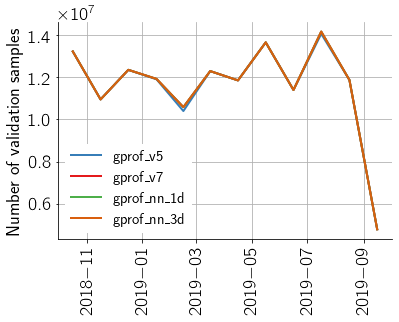

In [20]:
plot_time_dist(results_mhs)

In [21]:
del results_mhs

In [22]:
from gprof_nn.validation import calculate_error_metrics
results_atms = {}
for k in groups:
    results_atms[k] = xr.load_dataset(f"/home/simonpf/data_3/gprof_nn/validation/npp/results_{k}.nc")
stats_atms = calculate_error_metrics(results_atms, groups, rqi_threshold=0.8)
stats_atms["Sensor"] = "ATMS"
stats_atms_fpa = calculate_error_metrics(results_atms, groups, rqi_threshold=0.8, fpa=True)
stats_atms_fpa["Sensor"] = "ATMS"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


In [23]:
del results_atms

In [30]:
import pandas as pd
stats_gmi = pd.read_csv("gmi_2020_conus.csv", index_col=1)
stats_gmi["Sensor"] = "GMI"
stats_gmi = stats_gmi.iloc[:4]

In [31]:
import pandas as pd
stats = pd.concat([
    stats_gmi,
    stats_tmi,
    stats_ssmis,
    stats_amsr2,
    stats_mhs,
    stats_atms
])
stats = stats.reset_index().rename(columns={"index": "Algorithm"})


In [32]:
import pandas as pd
stats_fpa = pd.concat([
    stats_tmi_fpa,
    stats_ssmis_fpa,
    stats_amsr2_fpa,
    stats_mhs_fpa,
    stats_atms_fpa
])
stats_fpa = stats_fpa.reset_index().rename(columns={"index": "Algorithm"})

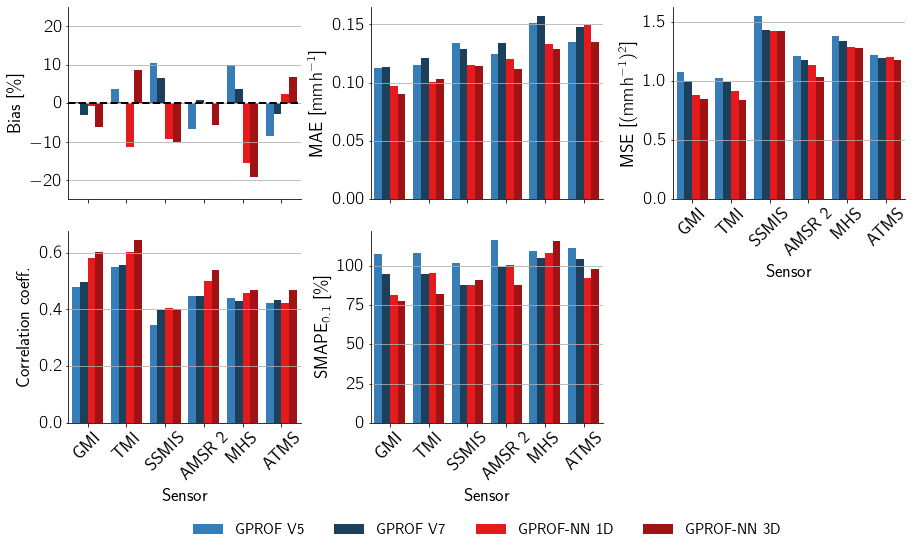

In [33]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(15, 10))
gs = GridSpec(3, 3, height_ratios= [1.0] * 2 + [0.5], wspace=0.3, hspace=0.2)

axs = np.array([
    [f.add_subplot(gs[i, j]) for j in range(3)]
    for i in range(2)
])

y_lims = {
    "Bias": [-25, 25]
}

y_labels = {
    "Bias": "Bias [$\si{\percent}$]",
    "MAE": "MAE [$\si{\milli \meter \per \hour}$]",
    "MSE": "MSE [$(\si{\milli \meter \per \hour})^2$]",
    "SMAPE": "SMAPE$_{0.1}$ [$\si{\percent}$]",
}

bar_palette = [
    COLORS["gprof_v5"],
    COLORS["gprof_v7"],
    COLORS["gprof_nn_1d"],
    COLORS["gprof_nn_3d"]
]

metrics = ["Bias", "MAE", "MSE", "Correlation coeff.", "SMAPE"]
for i, metric in enumerate(metrics):
    ax = axs[i // 3, i % 3]
    
    
    g = sns.barplot(x="Sensor", y=metric, hue="Algorithm",
                    data=stats, ax=ax, saturation=1.0, palette=bar_palette)
    g.legend_.set_visible(False)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    #ax.fill_betweenx([-200, 200], [-0.5, -0.5], [0.5, 0.5], color="lightgrey", zorder=10, alpha=0.5)
    #ax.axvline(0.5, -200, 200, c="darkgrey", ls="--")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if i == 0:
        ax.axhline(y=0, ls="--", c="k")
        
    if i // 3 == 0 and i % 3 < 2:
        ax.set_xticklabels([])
        ax.set_xlabel(None)
    else:
        for l in ax.get_xticklabels():
            l.set_rotation(45)

    if metric in y_labels:
        ax.set_ylabel(y_labels[metric])

    if metric in y_lims:
        ax.set_ylim(y_lims[metric])
        
    for label in ax.xaxis.get_ticklabels():
        #label.set_color("grey")
        break
        
axs[-1, -1].set_axis_off()
            
lax = f.add_subplot(gs[-1, :])
lax.set_axis_off()
lax.legend(*ax.get_legend_handles_labels(), ncol=5, loc="lower center")
#f.suptitle("Evaluation at 5-km resolution")

f.savefig("../../plots/validation/metrics_other_sensors.svg", bbox_inches="tight")
f.savefig("../../plots/validation/metrics_other_sensors.pdf", bbox_inches="tight")

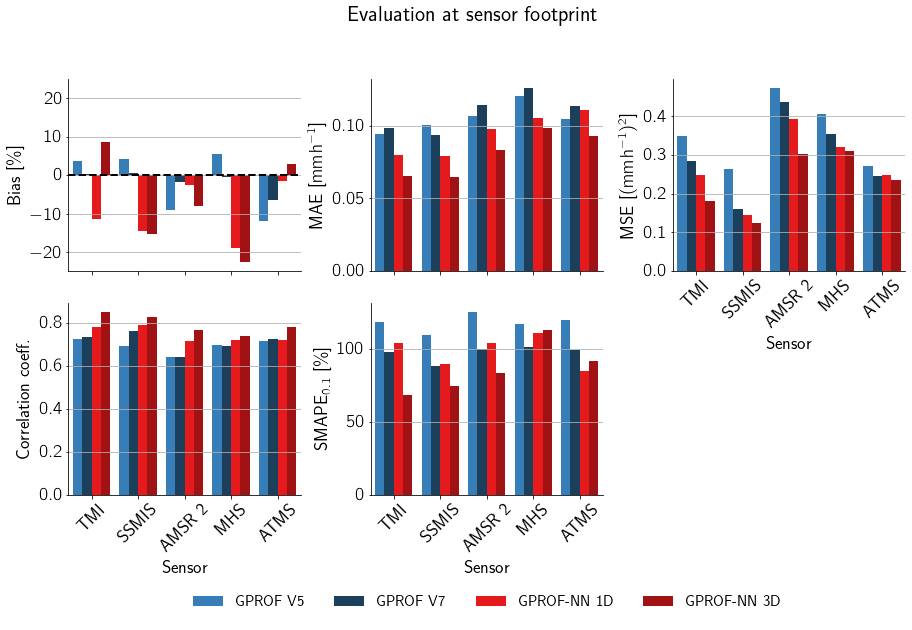

In [34]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(15, 10))
gs = GridSpec(3, 3, height_ratios= [1.0] * 2 + [0.5], wspace=0.3, hspace=0.2)

axs = np.array([
    [f.add_subplot(gs[i, j]) for j in range(3)]
    for i in range(2)
])

y_lims = {
    "Bias": [-25, 25]
}

y_labels = {
    "Bias": "Bias [$\si{\percent}$]",
    "MAE": "MAE [$\si{\milli \meter \per \hour}$]",
    "MSE": "MSE [$(\si{\milli \meter \per \hour})^2$]",
    "SMAPE": "SMAPE$_{0.1}$ [$\si{\percent}$]",
}

bar_palette = [
    COLORS["gprof_v5"],
    COLORS["gprof_v7"],
    COLORS["gprof_nn_1d"],
    COLORS["gprof_nn_3d"]
]



metrics = ["Bias", "MAE", "MSE", "Correlation coeff.", "SMAPE"]
for i, metric in enumerate(metrics):
    ax = axs[i // 3, i % 3]
    g = sns.barplot(x="Sensor", y=metric, hue="Algorithm",
                    data=stats_fpa, ax=ax, saturation=1.0, palette=bar_palette)
    g.legend_.set_visible(False)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    #ax.fill_betweenx([-200, 200], [-0.5, -0.5], [0.5, 0.5], color="lightgrey", zorder=10, alpha=0.5)
    #ax.axvline(0.5, -200, 200, c="darkgrey", ls="--")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if i == 0:
        ax.axhline(y=0, ls="--", c="k")
        
    if i // 3 == 0 and i % 3 < 2:
        ax.set_xticklabels([])
        ax.set_xlabel(None)
    else:
        for l in ax.get_xticklabels():
            l.set_rotation(45)

    if metric in y_labels:
        ax.set_ylabel(y_labels[metric])

    if metric in y_lims:
        ax.set_ylim(y_lims[metric])
        
    for label in ax.xaxis.get_ticklabels():
        #label.set_color("grey")
        break
        
axs[-1, -1].set_axis_off()
            
lax = f.add_subplot(gs[-1, :])
lax.set_axis_off()
lax.legend(*ax.get_legend_handles_labels(), ncol=5, loc="lower center")
f.suptitle("Evaluation at sensor footprint")

f.savefig("../../plots/validation/metrics_other_sensors_fpa.svg", bbox_inches="tight")

## Kwajalein

In [35]:
from gprof_nn.validation import calculate_error_metrics
data_path = Path("/home/simonpf/data_3/gprof_nn/validation/tmipo_kwaj/")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
results_tmi = {group: xr.load_dataset(data_path / f"results_{group}.nc") for group in groups}
#results_ssmis = pickle.load(open("/home/simonpf/data/gprof_nn/validation/ssmis/results.pckl", "rb"))
stats_tmi = calculate_error_metrics(results_tmi, groups, rqi_threshold=0.8, no_ocean=False)
stats_tmi["Sensor"] = "TMI"
stats_tmi_fpa = calculate_error_metrics(results_tmi, groups, rqi_threshold=0.8, fpa=True, ranges=80e3, no_ocean=False)
stats_tmi_fpa["Sensor"] = "TMI"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


In [36]:
stats_tmi_fpa

,Bias,MAE,MSE,Correlation coeff.,SMAPE,Sensor
GPROF V5,-10.141343,0.207143,0.561958,0.845406,70.550527,TMI
GPROF V7,-0.265511,0.211143,0.511216,0.861178,81.944378,TMI
GPROF-NN 1D,-31.449996,0.188486,0.543624,0.855084,85.412521,TMI
GPROF-NN 3D,-29.347191,0.169560,0.475655,0.875471,67.355123,TMI


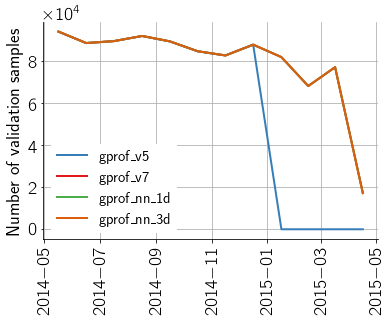

In [37]:
plot_time_dist(results_tmi)

In [38]:
from gprof_nn.validation import calculate_error_metrics
data_path = Path("/home/simonpf/data_3/gprof_nn/validation/mhs_kwaj/")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
results_mhs = {group: xr.load_dataset(data_path / f"results_{group}.nc") for group in groups}
#results_ssmis = pickle.load(open("/home/simonpf/data/gprof_nn/validation/ssmis/results.pckl", "rb"))
stats_mhs = calculate_error_metrics(results_mhs, groups, rqi_threshold=0.8, ranges=100e3, no_ocean=False)
stats_mhs["Sensor"] = "MHS"
stats_mhs_fpa = calculate_error_metrics(results_mhs, groups, rqi_threshold=0.8, fpa=True, no_ocean=False)
stats_mhs_fpa["Sensor"] = "MHS"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


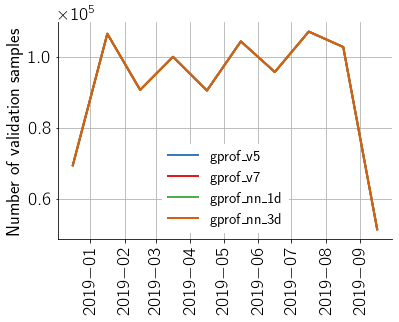

In [39]:
plot_time_dist(results_mhs)

In [40]:
from gprof_nn.validation import calculate_error_metrics
data_path = Path("/home/simonpf/data_3/gprof_nn/validation/ssmis_kwaj/")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
results_ssmis = {group: xr.load_dataset(data_path / f"results_{group}.nc") for group in groups}
#results_ssmis = pickle.load(open("/home/simonpf/data/gprof_nn/validation/ssmis/results.pckl", "rb"))
stats_ssmis = calculate_error_metrics(results_ssmis, groups, rqi_threshold=0.8, ranges=100e3, no_ocean=False)
stats_ssmis["Sensor"] = "SSMIS"
stats_ssmis_fpa = calculate_error_metrics(results_ssmis, groups, rqi_threshold=0.8, fpa=True, no_ocean=False)
stats_ssmis_fpa["Sensor"] = "SSMIS"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


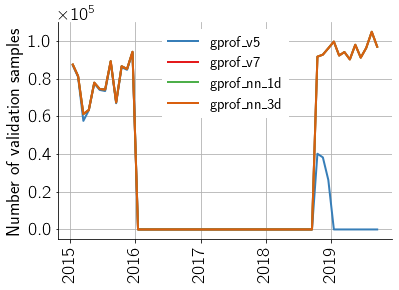

In [41]:
plot_time_dist(results_ssmis)

In [42]:
from gprof_nn.validation import calculate_error_metrics
data_path = Path("/home/simonpf/data_3/gprof_nn/validation/amsr2_kwaj/")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
results_amsr2 = {group: xr.load_dataset(data_path / f"results_{group}.nc") for group in groups}
#results_amsr2 = pickle.load(open("/home/simonpf/data/gprof_nn/validation/amsr2/results.pckl", "rb"))
stats_amsr2 = calculate_error_metrics(results_amsr2, groups, rqi_threshold=0.8, ranges=100e3, no_ocean=False)
stats_amsr2["Sensor"] = "AMSR2"
stats_amsr2_fpa = calculate_error_metrics(results_amsr2, groups, rqi_threshold=0.8, fpa=True, no_ocean=False)
stats_amsr2_fpa["Sensor"] = "AMSR2"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


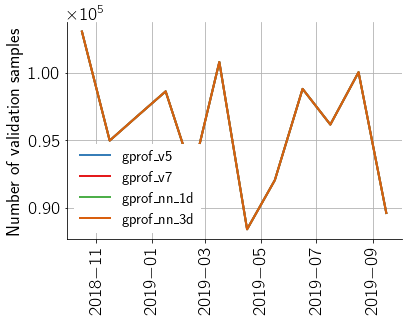

In [43]:
plot_time_dist(results_amsr2)

In [44]:
from gprof_nn.validation import calculate_error_metrics
data_path = Path("/home/simonpf/data_3/gprof_nn/validation/atms_kwaj/")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d"]
results_atms = {group: xr.load_dataset(data_path / f"results_{group}.nc") for group in groups}
#results_atms = pickle.load(open("/home/simonpf/data/gprof_nn/validation/atms/results.pckl", "rb"))
stats_atms = calculate_error_metrics(results_atms, groups, rqi_threshold=0.8, ranges=100e3, no_ocean=False)
stats_atms["Sensor"] = "ATMS"
stats_atms_fpa = calculate_error_metrics(results_atms, groups, rqi_threshold=0.8, fpa=True, no_ocean=False)
stats_atms_fpa["Sensor"] = "ATMS"

/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)
/home/simonpf/src/gprof_nn/gprof_nn/validation.py:1184: RuntimeWarning: invalid value encountered in true_divide
  rel_err = np.abs((sp - sp_ref) / ref)


In [45]:
stats_atms

,Bias,MAE,MSE,Correlation coeff.,SMAPE,Sensor
GPROF V5,-23.463848,0.241264,2.870234,0.318407,129.095648,ATMS
GPROF V7,9.198481,0.288510,2.885234,0.322903,109.475529,ATMS
GPROF-NN 1D,40.989654,0.338019,2.876988,0.332302,99.881635,ATMS
GPROF-NN 3D,-13.506040,0.243288,2.707435,0.378402,113.533002,ATMS


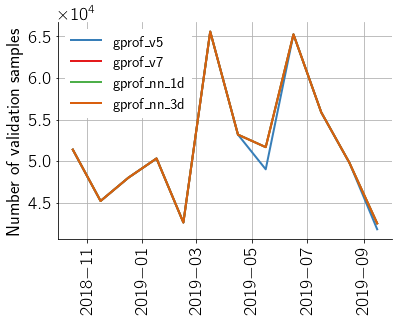

In [46]:
plot_time_dist(results_atms)

In [47]:
stats_gmi = pd.read_csv("gmi_2020_kwaj.csv", index_col=1)
stats_gmi["Sensor"] = "GMI"
stats_gmi = stats_gmi[:-2]
stats_gmi

,Unnamed: 0,Bias,MAE,MSE,Correlation coeff.,SMAPE,Region,Time period,Sensor
Algorithm,,,,,,,,,
GPROF V5,0,-2.840675,0.241632,2.355134,0.633644,91.906194,KWAJ,MRMS (2020),GMI
GPROF V7,1,10.964572,0.259266,2.306476,0.636390,91.752179,KWAJ,MRMS (2020),GMI
GPROF-NN 1D,2,21.722374,0.255483,2.152968,0.664201,86.507536,KWAJ,MRMS (2020),GMI
GPROF-NN 3D,3,23.670806,0.254472,2.076509,0.680297,85.915444,KWAJ,MRMS (2020),GMI


In [48]:
import pandas as pd
stats = pd.concat([
    stats_gmi,
    stats_tmi,
    stats_ssmis,
    stats_amsr2,
    stats_mhs,
    stats_atms,
])
stats = stats.reset_index().rename(columns={"index": "Algorithm"})

In [49]:
import pandas as pd
stats_fpa = pd.concat([
    stats_tmi_fpa,
    stats_ssmis_fpa,
    stats_amsr2_fpa,
    stats_mhs_fpa,
    stats_atms_fpa
])
stats_fpa = stats_fpa.reset_index().rename(columns={"index": "Algorithm"})

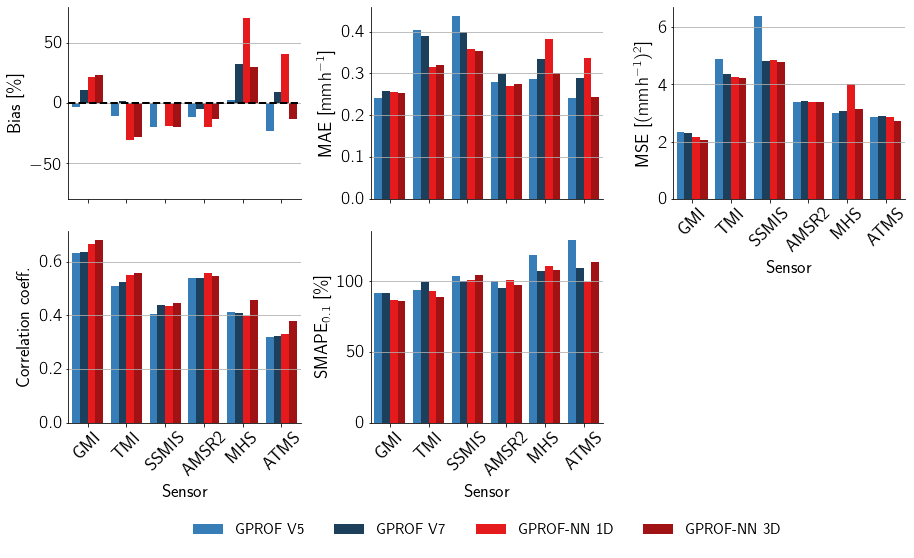

In [50]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(15, 10))
gs = GridSpec(3, 3, height_ratios= [1.0] * 2 + [0.5], wspace=0.3, hspace=0.2)

axs = np.array([
    [f.add_subplot(gs[i, j]) for j in range(3)]
    for i in range(2)
])

y_lims = {
    "Bias": [-80, 80]
}

y_labels = {
    "Bias": "Bias [$\si{\percent}$]",
    "MAE": "MAE [$\si{\milli \meter \per \hour}$]",
    "MSE": "MSE [$(\si{\milli \meter \per \hour})^2$]",
    "SMAPE": "SMAPE$_{0.1}$ [$\si{\percent}$]",
}

bar_palette = [
    COLORS["gprof_v5"],
    COLORS["gprof_v7"],
    COLORS["gprof_nn_1d"],
    COLORS["gprof_nn_3d"]
]



metrics = ["Bias", "MAE", "MSE", "Correlation coeff.", "SMAPE"]
for i, metric in enumerate(metrics):
    ax = axs[i // 3, i % 3]
    g = sns.barplot(x="Sensor", y=metric, hue="Algorithm",
                    data=stats, ax=ax, saturation=1.0, palette=bar_palette)
    g.legend_.set_visible(False)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    #ax.fill_betweenx([-200, 200], [-0.5, -0.5], [0.5, 0.5], color="lightgrey", zorder=10, alpha=0.5)
    #ax.axvline(0.5, -200, 200, c="darkgrey", ls="--")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if i == 0:
        ax.axhline(y=0, ls="--", c="k")
        
    if i // 3 == 0 and i % 3 < 2:
        ax.set_xticklabels([])
        ax.set_xlabel(None)
    else:
        for l in ax.get_xticklabels():
            l.set_rotation(45)

    if metric in y_labels:
        ax.set_ylabel(y_labels[metric])

    if metric in y_lims:
        ax.set_ylim(y_lims[metric])
        
axs[-1, -1].set_axis_off()
            
lax = f.add_subplot(gs[-1, :])
lax.set_axis_off()
lax.legend(*ax.get_legend_handles_labels(), ncol=5, loc="lower center")
#f.suptitle("Evaluation at 5-km resolution")

f.savefig("../../plots/validation/metrics_other_sensors_kwaj.svg", bbox_inches="tight")
f.savefig("../../plots/validation/metrics_other_sensors_kwaj.pdf", bbox_inches="tight")

In [ ]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(15, 10))
gs = GridSpec(3, 3, height_ratios= [1.0] * 2 + [0.5], wspace=0.3, hspace=0.2)

axs = np.array([
    [f.add_subplot(gs[i, j]) for j in range(3)]
    for i in range(2)
])

y_lims = {
    "Bias": [-60, 60]
}

y_labels = {
    "Bias": "Bias [$\si{\percent}$]",
    "MAE": "MAE [$\si{\milli \meter \per \hour}$]",
    "MSE": "MSE [$(\si{\milli \meter \per \hour})^2$]",
    "SMAPE": "SMAPE$_{0.1}$ [$\si{\percent}$]",
}

bar_palette = [
    COLORS["gprof_v5"],
    COLORS["gprof_v7"],
    COLORS["gprof_nn_1d"],
    COLORS["gprof_nn_3d"]
]



metrics = ["Bias", "MAE", "MSE", "Correlation coeff.", "SMAPE"]
for i, metric in enumerate(metrics):
    ax = axs[i // 3, i % 3]
    g = sns.barplot(x="Sensor", y=metric, hue="Algorithm",
                    data=stats_fpa, ax=ax, saturation=1.0, palette=bar_palette)
    g.legend_.set_visible(False)


    if i == 0:
        ax.axhline(y=0, ls="--", c="k")
        
    if i // 3 == 0 and i % 3 < 2:
        ax.set_xticklabels([])
        ax.set_xlabel(None)
    else:
        for l in ax.get_xticklabels():
            l.set_rotation(45)

    if metric in y_labels:
        ax.set_ylabel(y_labels[metric])

    if metric in y_lims:
        ax.set_ylim(y_lims[metric])
        
axs[-1, -1].set_axis_off()
            
lax = f.add_subplot(gs[-1, :])
lax.set_axis_off()
lax.legend(*ax.get_legend_handles_labels(), ncol=5, loc="lower center")
f.suptitle("Evaluation at 5-km resolution")

f.savefig("../../plots/validation/metrics_other_sensors.svg", bbox_inches="tight")